# Text Clustering samples - Adv

Excellent samples obtained from this [link](https://stackoverflow.com/questions/43541187/how-can-i-plot-a-kmeans-text-clustering-result-with-matplotlib),

Thanks stackoverflow 👍🏽

Further reading:
- [Plotly (Scatter, Bar, Pie Chart) and Word Cloud](https://www.kaggle.com/mehmetkasap/plotly-scatter-bar-pie-chart-and-word-cloud)
- [Exploring and Analyzing Network Data with Python](https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python)
- [Document Clustering with Python](http://brandonrose.org/clustering?ref=dzone)
- [Clustering in Python/v3](https://plotly.com/python/v3/ipython-notebooks/baltimore-vital-signs/)
- [Analyze Co-occurrence and Networks of Words Using Twitter Data and Tweepy in Python](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/)
- [Getting started with graph analysis in Python with pandas and networkx](https://towardsdatascience.com/getting-started-with-graph-analysis-in-python-with-pandas-and-networkx-5e2d2f82f18e)

### Example I, plotting only centroids

[[ 2742.8013    132.52274]
 [-3359.2295  -4287.793  ]
 [  307.9944   5835.097  ]
 [-3959.3457   1438.7327 ]
 [-3959.3457   1438.7327 ]
 [ 2742.8013    132.52274]
 [ 1859.9021  -5860.845  ]
 [ 2742.8013    132.52274]]


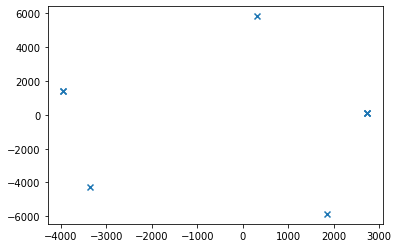

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

train = ["is this good?", "this is bad", "some other text here", "i am hero", "blue jeans", "red carpet", "red dog",
     "blue sweater", "red hat", "kitty blue"]

vect = TfidfVectorizer()  
X = vect.fit_transform(train)
random_state = 1
clf = KMeans(random_state = random_state)
data = clf.fit(X)
centroids = clf.cluster_centers_

tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_centroids = model.fit_transform(centroids)
print (transformed_centroids)
plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
plt.show()

### Example II, Centroids with other vectors

[[ 2.6816638  -1.3932229 ]
 [ 2.7802625  -2.4289935 ]
 [ 2.5505207  -0.7690551 ]
 [ 2.1877017  -2.0482984 ]
 [ 4.79737    -1.112677  ]
 [ 1.6610066  -0.7269162 ]
 [ 5.157918   -0.68261147]
 [ 2.676313   -1.7253106 ]
 [ 4.79737    -1.112677  ]
 [ 1.8437513  -1.6463609 ]
 [ 1.1865712  -1.4392483 ]
 [ 4.79737    -1.112677  ]
 [ 1.4678024  -2.1162484 ]
 [ 4.79737    -1.112677  ]
 [ 1.4349307  -2.1727154 ]
 [ 4.250208   -0.8234308 ]
 [ 2.1721032  -0.5203802 ]
 [ 4.46487    -1.8113968 ]
 [ 2.2308843  -2.6344655 ]
 [ 5.181582   -1.6081668 ]
 [ 1.535641   -0.9233495 ]
 [ 4.46487    -1.8113968 ]
 [ 1.1793472  -1.3886335 ]
 [ 5.181582   -1.6081668 ]
 [ 2.2330856  -1.5969881 ]
 [ 4.250208   -0.8234308 ]
 [ 1.9912467  -0.98241466]
 [ 4.6271553  -0.49813458]
 [ 2.0007014  -1.4980685 ]
 [ 4.445151   -1.2773988 ]]


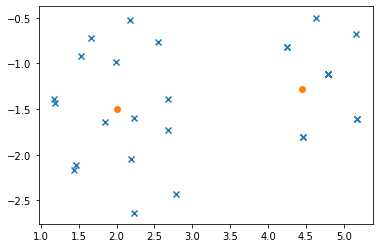

In [2]:
import matplotlib.pyplot as plt
from numpy import concatenate
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

train = [
    'In 1917 a German Navy flight crashed at/near Off western Denmark with 18 aboard',
    # 'There were 18 passenger/crew fatalities',
    'In 1942 a Deutsche Lufthansa flight crashed at an unknown location with 4 aboard',
    # 'There were 4 passenger/crew fatalities',
    'In 1946 Trans Luxury Airlines flight 878 crashed at/near Moline, Illinois with 25 aboard',
    # 'There were 2 passenger/crew fatalities',
    'In 1947 a Slick Airways flight crashed at/near Hanksville, Utah with 3 aboard',
    'There were 3 passenger/crew fatalities',
    'In 1949 a Royal Canadian Air Force flight crashed at/near Near Bigstone Lake, Manitoba with 21 aboard',
    'There were 21 passenger/crew fatalities',
    'In 1952 a Airwork flight crashed at/near Off Trapani, Italy with 57 aboard',
    'There were 7 passenger/crew fatalities',
    'In 1963 a Aeroflot flight crashed at/near Near Leningrad, Russia with 52 aboard',
    'In 1966 a Alaska Coastal Airlines flight crashed at/near Near Juneau, Alaska with 9 aboard',
    'There were 9 passenger/crew fatalities',
    'In 1986 a Air Taxi flight crashed at/near Frenchglen, Oregon with 6 aboard',
    'There were 3 passenger/crew fatalities',
    'In 1989 a Air Taxi flight crashed at/near Gold Beach, Oregon with 3 aboard',
    'There were 18 passenger/crew fatalities',
    'In 1990 a Republic of China Air Force flight crashed at/near Yunlin, Taiwan with 18 aboard',
    'There were 10 passenger/crew fatalities',
    'In 1992 a Servicios Aereos Santa Ana flight crashed at/near Colorado, Bolivia with 10 aboard',
    'There were 44 passenger/crew fatalities',
    'In 1994 Royal Air Maroc flight 630 crashed at/near Near Agadir, Morocco with 44 aboard',
    'There were 10 passenger/crew fatalities',
    'In 1995 Atlantic Southeast Airlines flight 529 crashed at/near Near Carrollton, GA with 29 aboard',
    'There were 44 passenger/crew fatalities',
    'In 1998 a Lumbini Airways flight crashed at/near Near Ghorepani, Nepal with 18 aboard',
    'There were 18 passenger/crew fatalities',
    'In 2004 a Venezuelan Air Force flight crashed at/near Near Maracay, Venezuela with 25 aboard',
    'There were 25 passenger/crew fatalities',
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train)
n_clusters = 2
random_state = 1
clf = KMeans(n_clusters=n_clusters, random_state=random_state)
data = clf.fit(X)
centroids = clf.cluster_centers_
# we want to transform the rows and the centroids
everything = concatenate((X.todense(), centroids))


tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1

model = TSNE(n_components=2, random_state=random_state, init=tsne_init,
    perplexity=tsne_perplexity,
    early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_everything = model.fit_transform(everything)
print(transformed_everything)
plt.scatter(transformed_everything[:-n_clusters, 0], transformed_everything[:-n_clusters, 1], marker='x')
plt.scatter(transformed_everything[-n_clusters:, 0], transformed_everything[-n_clusters:, 1], marker='o')

plt.show()

In [10]:
data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)